In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
df=pd.read_excel("Data_Train.xlsx")

In [3]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302


In [4]:
df.shape

(10683, 11)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10683 non-null  object
 1   Date_of_Journey  10683 non-null  object
 2   Source           10683 non-null  object
 3   Destination      10683 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10683 non-null  object
 6   Arrival_Time     10683 non-null  object
 7   Duration         10683 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10683 non-null  object
 10  Price            10683 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.2+ KB


In [6]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              1
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        1
Additional_Info    0
Price              0
dtype: int64

In [7]:
df.isnull().sum().sum()

2

In [8]:
df.describe()

,Price
count,10683.000000
mean,9087.064121
std,4611.359167
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


In [9]:
df.describe(include=object)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info
count,10683,10683,10683,10683,10682,10683,10683,10683,10682,10683
unique,12,44,5,6,128,222,1343,368,5,10
top,Jet Airways,18/05/2019,Delhi,Cochin,DEL → BOM → COK,18:55,19:00,2h 50m,1 stop,No info
freq,3849,504,4537,4537,2376,233,423,550,5625,8345


In [10]:
df['Route'].mode()

0    DEL → BOM → COK
Name: Route, dtype: object

In [11]:
df['Route']=df['Route'].fillna(df['Route'].mode()[0])

In [12]:
df['Total_Stops'].mode()

0    1 stop
Name: Total_Stops, dtype: object

In [13]:
df['Total_Stops']=df['Total_Stops'].fillna(df['Total_Stops'].mode()[0])

In [14]:
df.isnull().sum()

Airline            0
Date_of_Journey    0
Source             0
Destination        0
Route              0
Dep_Time           0
Arrival_Time       0
Duration           0
Total_Stops        0
Additional_Info    0
Price              0
dtype: int64

In [15]:
df.isnull().sum().sum()

0

In [16]:
df['Date_of_Journey']=pd.to_datetime(df['Date_of_Journey'])

In [17]:
df.head(20)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
5,SpiceJet,2019-06-24,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,3873
6,Jet Airways,2019-12-03,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087
7,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270
8,Jet Airways,2019-12-03,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087
9,Multiple carriers,2019-05-27,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1 stop,No info,8625


In [18]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10683 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10683 non-null  object        
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 918.2+ KB


In [19]:
df['Total_Stops'].unique()

array(['non-stop', '2 stops', '1 stop', '3 stops', '4 stops'],
      dtype=object)

In [20]:
df.replace({"non-stop":0, "1 stop":1, "2 stops":2,"3 stops":3,"4 stops":4},inplace=True)

In [21]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302


In [22]:
df.head(20)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302
5,SpiceJet,2019-06-24,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,0,No info,3873
6,Jet Airways,2019-12-03,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1,In-flight meal not included,11087
7,Jet Airways,2019-01-03,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1,No info,22270
8,Jet Airways,2019-12-03,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1,In-flight meal not included,11087
9,Multiple carriers,2019-05-27,Delhi,Cochin,DEL → BOM → COK,11:25,19:15,7h 50m,1,No info,8625


In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10683 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10683 non-null  int64         
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 918.2+ KB


# 1st Insight: How many Flight with respect to their stopages?

In [24]:
df.groupby(['Total_Stops'])['Airline'].count()

Total_Stops
0    3491
1    5626
2    1520
3      45
4       1
Name: Airline, dtype: int64

In [25]:
df['Total_Stops'].value_counts()

1    5626
0    3491
2    1520
3      45
4       1
Name: Total_Stops, dtype: int64

In [26]:
df[df['Total_Stops']==4]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9182,Air India,2019-01-03,Banglore,New Delhi,BLR → CCU → BBI → HYD → VGA → DEL,05:50,11:20 02 Mar,29h 30m,4,Change airports,17686


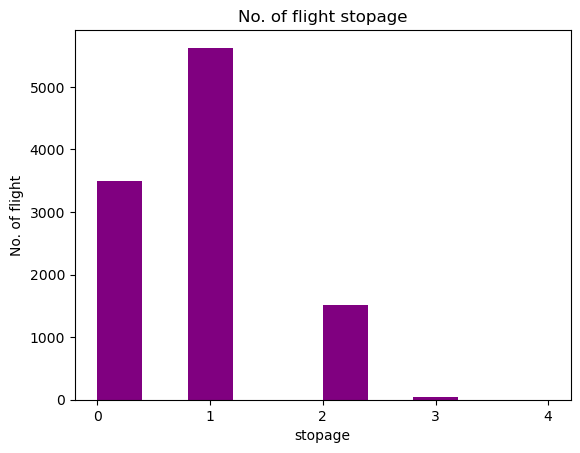

In [27]:
plt.title('No. of flight stopage')
plt.hist(df['Total_Stops'],color='purple')
plt.xlabel('stopage')
plt.ylabel('No. of flight')
plt.xticks(df['Total_Stops'].unique())
plt.show()

In [28]:
df.groupby(['Airline','Total_Stops'])['Total_Stops'].count()

Airline                            Total_Stops
Air Asia                           0               181
                                   1               129
                                   2                 9
Air India                          0               417
                                   1               541
                                   2               756
                                   3                37
                                   4                 1
GoAir                              0                92
                                   1               102
IndiGo                             0              1241
                                   1               793
                                   2                19
Jet Airways                        0               623
                                   1              2535
                                   2               691
Jet Airways Business               1                 4
                  

In [29]:
df.groupby(['Airline'])['Total_Stops'].count()

Airline
Air Asia                              319
Air India                            1752
GoAir                                 194
IndiGo                               2053
Jet Airways                          3849
Jet Airways Business                    6
Multiple carriers                    1196
Multiple carriers Premium economy      13
SpiceJet                              818
Trujet                                  1
Vistara                               479
Vistara Premium economy                 3
Name: Total_Stops, dtype: int64

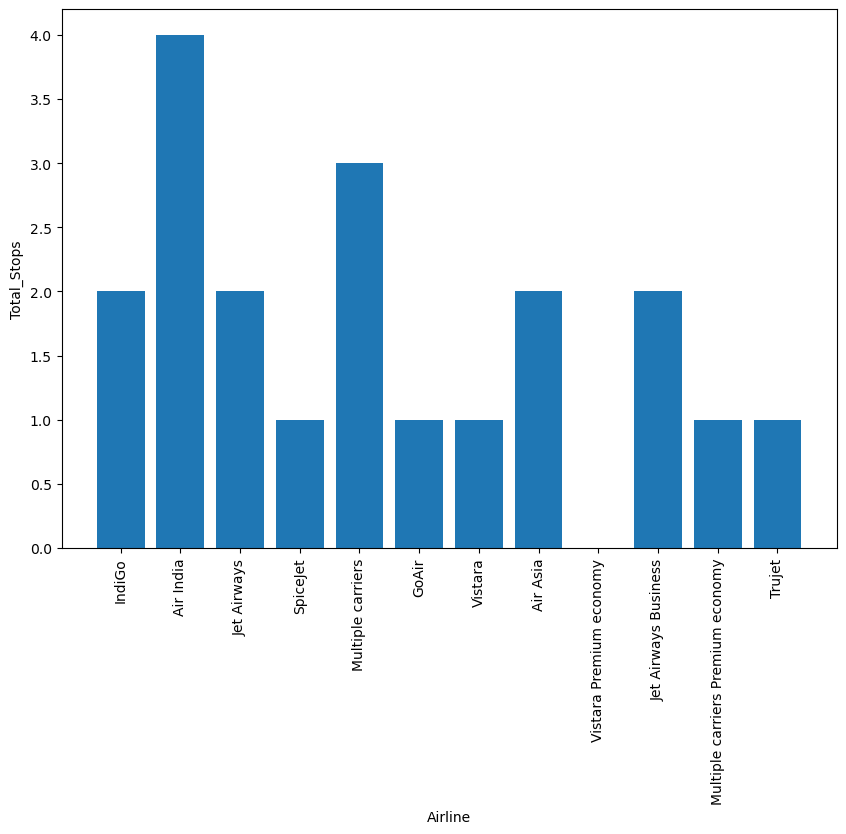

In [30]:
plt.figure(figsize=(10,7))
plt.bar(df['Airline'],df['Total_Stops'])
plt.xlabel('Airline')
plt.ylabel('Total_Stops')
plt.xticks(rotation=90)
plt.show()

In [31]:
x=df.copy()
x

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,0,No info,4107
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,0,No info,4145
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,0,No info,7229
10681,Vistara,2019-01-03,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,0,No info,12648


In [32]:
y=df.groupby(['Airline','Total_Stops'])['Total_Stops'].count().to_frame().rename(columns={'Total_Stops':'count'})
y

count
Airline                           Total_Stops       
Air Asia                          0              181
                                  1              129
                                  2                9
Air India                         0              417
                                  1              541
                                  2              756
                                  3               37
                                  4                1
GoAir                             0               92
                                  1              102
IndiGo                            0             1241
                                  1              793
                                  2               19
Jet Airways                       0              623
                                  1             2535
                                  2              691
Jet Airways Business              1                4
                                  2                2
Multiple carriers                 1             1145
                                  2               43
                                  3                8
Multiple carriers Premium economy 1               13
SpiceJet                          0              670
                                  1              148
Trujet                            1                1
Vistara                           0              264
                                  1              215
Vistara Premium economy           0                3

In [33]:
z=pd.merge(x,y,on=['Airline','Total_Stops'],how='inner')
z

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,count
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,1241
1,IndiGo,2019-04-18,Kolkata,Banglore,CCU → BLR,20:20,22:55,2h 35m,0,No info,4174,1241
2,IndiGo,2019-04-24,Kolkata,Banglore,CCU → BLR,17:15,19:50,2h 35m,0,No info,4804,1241
3,IndiGo,2019-03-04,Banglore,Delhi,BLR → DEL,04:00,06:50,2h 50m,0,No info,3943,1241
4,IndiGo,2019-01-05,Banglore,Delhi,BLR → DEL,18:55,21:50,2h 55m,0,No info,4823,1241
...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Multiple carriers,2019-09-06,Delhi,Cochin,DEL → GWL → IDR → BOM → COK,11:35,21:00,9h 25m,3,No info,15629,8
10679,Trujet,2019-06-03,Mumbai,Hyderabad,BOM → NDC → HYD,13:05,16:20,3h 15m,1,No info,4140,1
10680,Jet Airways Business,2019-03-03,Delhi,Cochin,DEL → ATQ → BOM → COK,20:05,04:25 04 Mar,8h 20m,2,No info,46490,2
10681,Jet Airways Business,2019-06-03,Delhi,Cochin,DEL → ATQ → BOM → COK,20:05,04:25 07 Mar,8h 20m,2,No info,52285,2


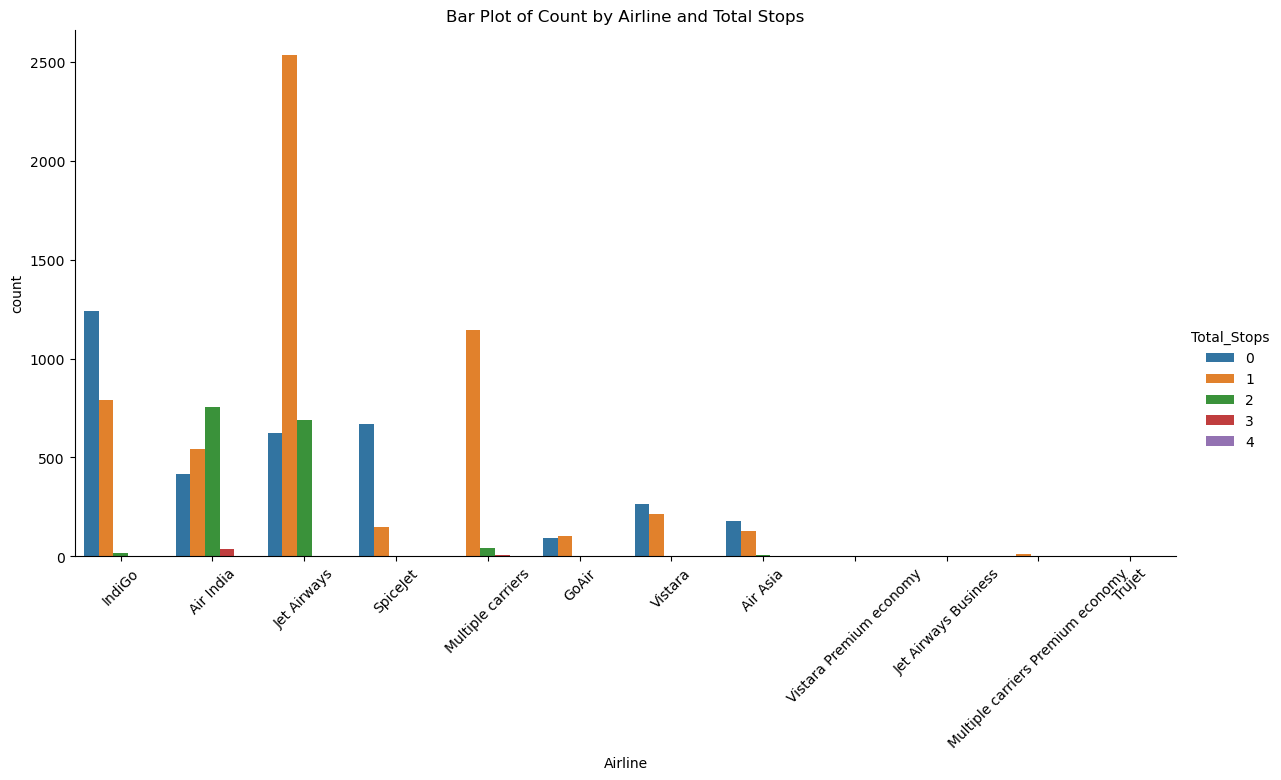

In [34]:
sns.catplot(
    x='Airline', 
    y='count', 
    hue='Total_Stops', 
    kind='bar', 
    data=z, 
    height=6, 
    aspect=2
)
plt.xticks(rotation=45)  # Rotate x-axis labels for clarity
plt.title("Bar Plot of Count by Airline and Total Stops")
plt.show()

# 2nd Insights: what flight is Expensive and cheaper ?


In [35]:
p=df.groupby(['Airline'])['Price'].agg(['min','max']).reset_index().sort_values(by='max',ascending=False)

In [36]:
p

,Airline,min,max
5,Jet Airways Business,46490,79512
4,Jet Airways,1840,54826
6,Multiple carriers,5797,36983
1,Air India,2050,31945
8,SpiceJet,1759,23267
2,GoAir,3398,22794
3,IndiGo,2227,22153
10,Vistara,3687,21730
7,Multiple carriers Premium economy,9845,14629
0,Air Asia,3383,13774


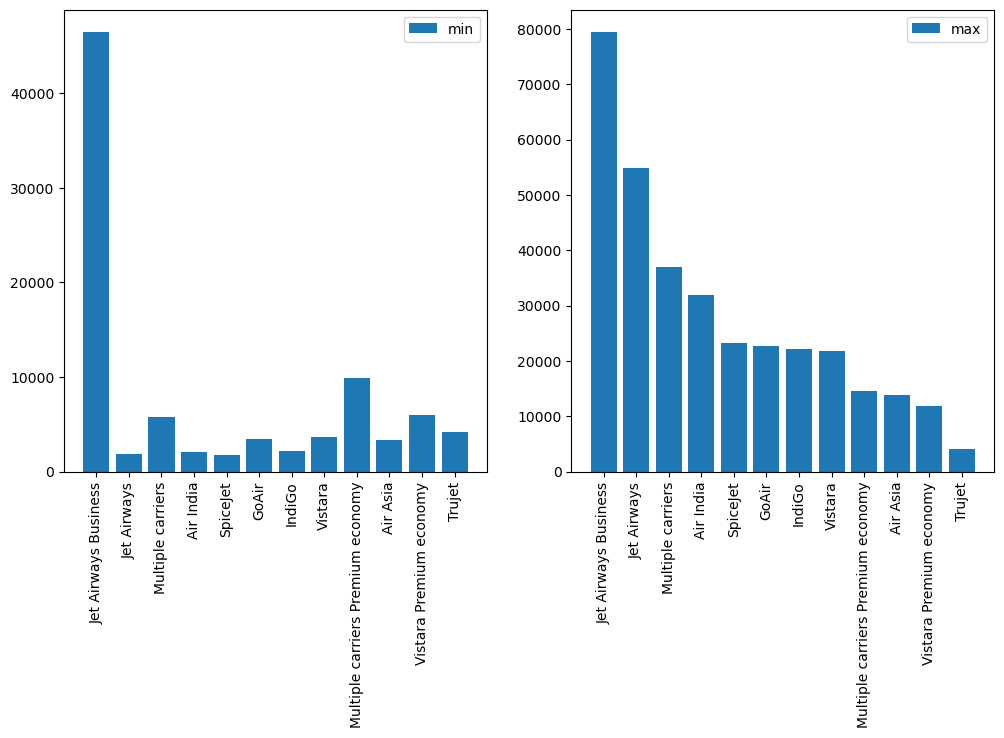

In [37]:
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.bar(p['Airline'],p['min'],label='min')
plt.xticks(rotation=90)
plt.legend()

plt.subplot(1,2,2)
plt.bar(p['Airline'],p['max'],label='max')
plt.xticks(rotation=90)
plt.legend()

plt.show()

# 3rd insights: Variations of flight Price from source

In [38]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,2019-03-24,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218
4,IndiGo,2019-01-03,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302


In [39]:
df['Source'].unique()

array(['Banglore', 'Kolkata', 'Delhi', 'Chennai', 'Mumbai'], dtype=object)

In [40]:
df['Destination'].unique()

array(['New Delhi', 'Banglore', 'Cochin', 'Kolkata', 'Delhi', 'Hyderabad'],
      dtype=object)

In [41]:
df.replace({'New Delhi':'Delhi'},inplace=True)

In [42]:
sd=df.groupby(['Source','Destination'])['Price'].sum().reset_index()

In [43]:
sd

,Source,Destination,Price
0,Banglore,Delhi,17614369
1,Chennai,Kolkata,1824949
2,Delhi,Cochin,47817435
3,Kolkata,Banglore,26293736
4,Mumbai,Hyderabad,3526617


In [44]:
sd1=df.groupby(['Source','Destination','Airline'])['Price'].agg(['sum','max','min','mean','count']).reset_index()
sd1

,Source,Destination,Airline,sum,max,min,mean,count
0,Banglore,Delhi,Air Asia,407111,10873,3383,4574.280899,89
1,Banglore,Delhi,Air India,3067082,31783,3758,9238.198795,332
2,Banglore,Delhi,GoAir,460246,18558,3398,4948.881720,93
3,Banglore,Delhi,IndiGo,2758361,22153,3359,5274.112811,523
4,Banglore,Delhi,Jet Airways,8685125,54826,3359,11021.732234,788
5,Banglore,Delhi,Jet Airways Business,251377,79512,52229,62844.250000,4
6,Banglore,Delhi,SpiceJet,823603,23267,3257,4550.292818,181
7,Banglore,Delhi,Vistara,1143702,21730,4353,6182.172973,185
8,Banglore,Delhi,Vistara Premium economy,17762,11793,5969,8881.000000,2
9,Chennai,Kolkata,Air India,147391,19630,3145,5895.640000,25


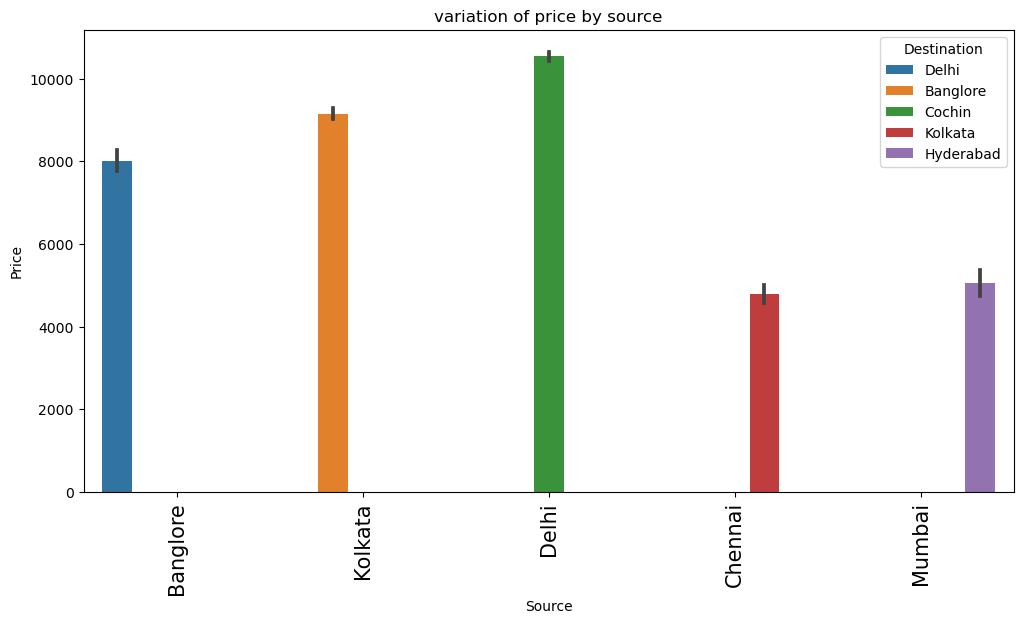

In [45]:
plt.figure(figsize=(12,6))
sns.barplot(x='Source',y='Price',hue='Destination',data=df)
plt.xticks(rotation=90,size=15)
plt.title('variation of price by source')
plt.show()

In [46]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   Airline          10683 non-null  object        
 1   Date_of_Journey  10683 non-null  datetime64[ns]
 2   Source           10683 non-null  object        
 3   Destination      10683 non-null  object        
 4   Route            10683 non-null  object        
 5   Dep_Time         10683 non-null  object        
 6   Arrival_Time     10683 non-null  object        
 7   Duration         10683 non-null  object        
 8   Total_Stops      10683 non-null  int64         
 9   Additional_Info  10683 non-null  object        
 10  Price            10683 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(8)
memory usage: 918.2+ KB


In [47]:
df['Date_of_Journey'].unique()

array(['2019-03-24T00:00:00.000000000', '2019-01-05T00:00:00.000000000',
       '2019-09-06T00:00:00.000000000', '2019-12-05T00:00:00.000000000',
       '2019-01-03T00:00:00.000000000', '2019-06-24T00:00:00.000000000',
       '2019-12-03T00:00:00.000000000', '2019-05-27T00:00:00.000000000',
       '2019-01-06T00:00:00.000000000', '2019-04-18T00:00:00.000000000',
       '2019-09-05T00:00:00.000000000', '2019-04-24T00:00:00.000000000',
       '2019-03-03T00:00:00.000000000', '2019-04-15T00:00:00.000000000',
       '2019-12-06T00:00:00.000000000', '2019-06-03T00:00:00.000000000',
       '2019-03-21T00:00:00.000000000', '2019-03-04T00:00:00.000000000',
       '2019-06-05T00:00:00.000000000', '2019-05-15T00:00:00.000000000',
       '2019-06-18T00:00:00.000000000', '2019-06-15T00:00:00.000000000',
       '2019-06-04T00:00:00.000000000', '2019-05-18T00:00:00.000000000',
       '2019-06-27T00:00:00.000000000', '2019-05-21T00:00:00.000000000',
       '2019-03-06T00:00:00.000000000', '2019-03-15

In [48]:
df['Day_of_Journey']=df['Date_of_Journey'].dt.day
df['Month_of_Journey']=df['Date_of_Journey'].dt.month

In [49]:
df['Day_of_Journey'].unique()

array([24,  5,  6,  3, 27, 18, 15, 21,  4], dtype=int64)

In [50]:
df['Month_of_Journey'].unique()

array([ 3,  1,  9, 12,  6,  5,  4], dtype=int64)

In [51]:
df.head(2)

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,5,1


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10683 entries, 0 to 10682
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Airline           10683 non-null  object        
 1   Date_of_Journey   10683 non-null  datetime64[ns]
 2   Source            10683 non-null  object        
 3   Destination       10683 non-null  object        
 4   Route             10683 non-null  object        
 5   Dep_Time          10683 non-null  object        
 6   Arrival_Time      10683 non-null  object        
 7   Duration          10683 non-null  object        
 8   Total_Stops       10683 non-null  int64         
 9   Additional_Info   10683 non-null  object        
 10  Price             10683 non-null  int64         
 11  Day_of_Journey    10683 non-null  int64         
 12  Month_of_Journey  10683 non-null  int64         
dtypes: datetime64[ns](1), int64(4), object(8)
memory usage: 1.1+ MB


In [53]:
df['year_of_Journey']=df['Date_of_Journey'].dt.year

In [54]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey,year_of_Journey
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,24,3,2019
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,5,1,2019
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,6,9,2019
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,5,12,2019
4,IndiGo,2019-01-03,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,3,1,2019


In [55]:
df['year_of_Journey'].unique()

array([2019], dtype=int64)

In [56]:
df['year_of_Journey'].nunique()

1

In [57]:
df.drop(columns=['year_of_Journey'],inplace=True)

In [58]:
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,3,1


# 5th Insight: On What monthmaximum flight take off?

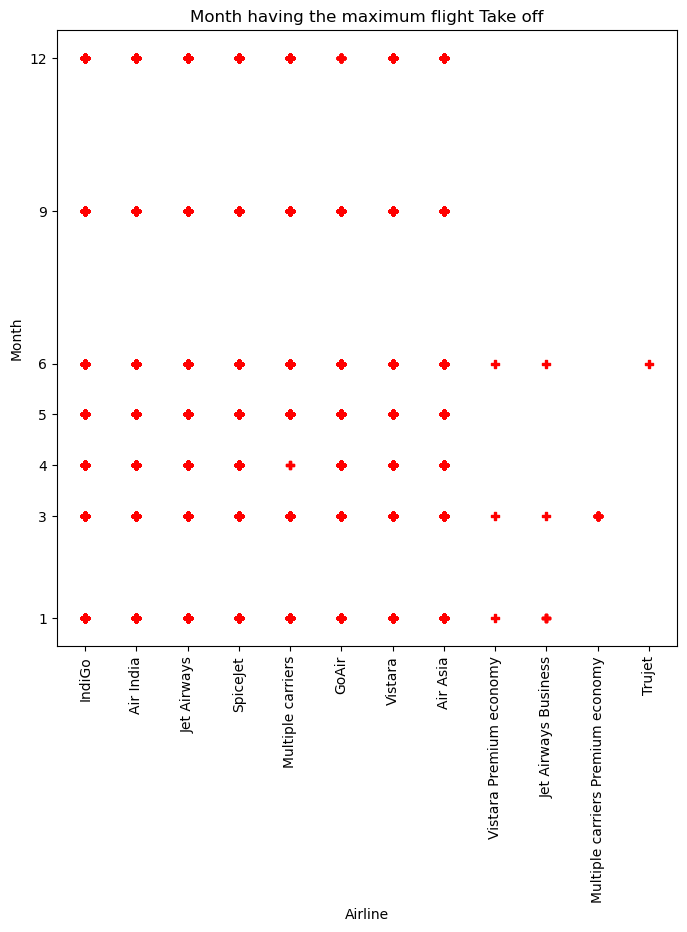

In [59]:
plt.figure(figsize=(8,8))
Month=list(df['Month_of_Journey'])
Airline=list(df['Airline'])
plt.scatter(Airline,Month,marker='P',color='red')
plt.xticks(rotation=90)
plt.yticks(df['Month_of_Journey'].unique())
plt.title('Month having the maximum flight Take off')
plt.xlabel('Airline')
plt.ylabel('Month')
plt.show()

# 6th Insights: What Month has The Maximum Earning

In [60]:
p=df.groupby(['Month_of_Journey'])['Price'].agg(['sum']).reset_index().sort_values(by='sum',ascending=False)
p

,Month_of_Journey,sum
4,6,23369151
3,5,19414875
1,3,18647220
5,9,13429373
0,1,11279591
6,12,8719011
2,4,2217885


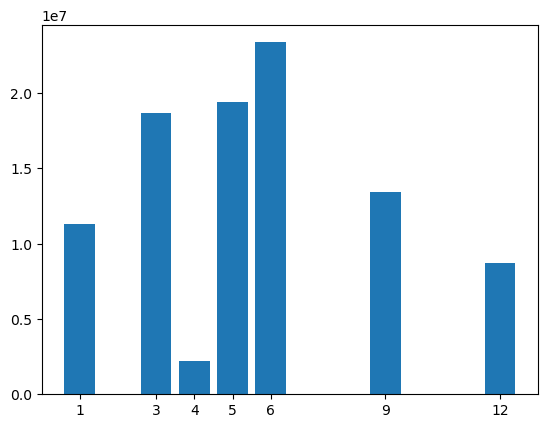

In [61]:
plt.bar(p['Month_of_Journey'],p['sum'])
plt.xticks(p['Month_of_Journey']);

In [62]:
# Prices
z=df.groupby(['Month_of_Journey'])['Price'].agg(['sum']).iloc[:,0]
z=list(z)
z

[11279591, 18647220, 2217885, 19414875, 23369151, 13429373, 8719011]

In [63]:
# Month
a=df.groupby(['Month_of_Journey'])['Price'].agg(['sum']).index
a=list(a)
a

[1, 3, 4, 5, 6, 9, 12]

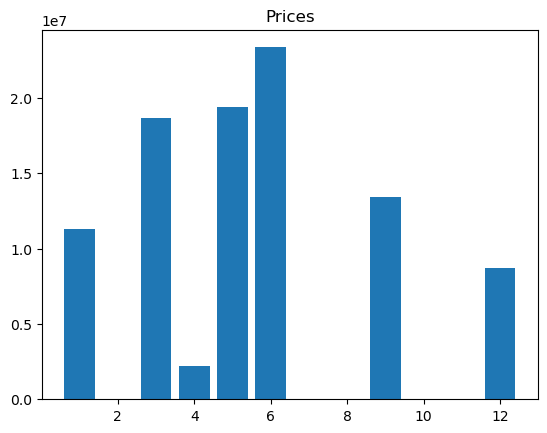

In [64]:
plt.bar(a,z)
plt.title('Prices')
plt.show()

In [65]:
df['Airline'].unique()

array(['IndiGo', 'Air India', 'Jet Airways', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

In [66]:
df['Airline'].nunique()

12

# 7th Insights: Checking the Availablity of Flight with respect to Source and Destination

In [67]:
df1=df.groupby(['Destination','Source'])['Airline'].value_counts()

In [68]:
df1

Destination  Source    Airline                          
Banglore     Kolkata   Jet Airways                          1256
                       Air India                             512
                       IndiGo                                445
                       SpiceJet                              300
                       Vistara                               183
                       Air Asia                              150
                       GoAir                                  25
Cochin       Delhi     Jet Airways                          1586
                       Multiple carriers                    1196
                       Air India                             747
                       IndiGo                                705
                       SpiceJet                               87
                       Air Asia                               80
                       GoAir                                  76
                       Vistara   

In [69]:
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,Month_of_Journey
0,IndiGo,2019-03-24,Banglore,Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,0,No info,3897,24,3
1,Air India,2019-01-05,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2,No info,7662,5,1
2,Jet Airways,2019-09-06,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2,No info,13882,6,9
3,IndiGo,2019-12-05,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1,No info,6218,5,12
4,IndiGo,2019-01-03,Banglore,Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1,No info,13302,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,2019-09-04,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,0,No info,4107,4,9
10679,Air India,2019-04-27,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,0,No info,4145,27,4
10680,Jet Airways,2019-04-27,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,0,No info,7229,27,4
10681,Vistara,2019-01-03,Banglore,Delhi,BLR → DEL,11:30,14:10,2h 40m,0,No info,12648,3,1
